In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Symptoms.csv")
df.head()

,Unnamed: 0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,2,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,3,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
df["Disease"].unique()
# we have a set of data in disease.csv which have the output symmetery

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [5]:
df.isnull().values.any()

False

In [6]:
# we need to create an dicinoary to get the data in the format of disesce.csv
disease=pd.read_csv("./Train_Test_data/disease.csv")
disease.head()

,Unnamed: 0,Disease
0,0,Drug Reaction
1,1,Malaria
2,2,Allergy
3,3,Hypothyroidism
4,4,Psoriasis


In [7]:
def creation_of_map(x):
    dicr={}
    count=0
    for a in x:
        dicr[a]=count
        count+=1
    return dicr
map_data=creation_of_map(disease["Disease"])
print(map_data)

{'Drug Reaction': 0, 'Malaria': 1, 'Allergy': 2, 'Hypothyroidism': 3, 'Psoriasis': 4, 'GERD': 5, 'Chronic cholestasis': 6, 'hepatitis A': 7, 'Osteoarthristis': 8, '(vertigo) Paroymsal  Positional Vertigo': 9, 'Hypoglycemia': 10, 'Acne': 11, 'Diabetes': 12, 'Impetigo': 13, 'Hypertension': 14, 'Peptic ulcer diseae': 15, 'Dimorphic hemorrhoids(piles)': 16, 'Common Cold': 17, 'Chicken pox': 18, 'Cervical spondylosis': 19, 'Hyperthyroidism': 20, 'Urinary tract infection': 21, 'Varicose veins': 22, 'AIDS': 23, 'Paralysis (brain hemorrhage)': 24, 'Typhoid': 25, 'Hepatitis B': 26, 'Fungal infection': 27, 'Hepatitis C': 28, 'Migraine': 29, 'Bronchial Asthma': 30, 'Alcoholic hepatitis': 31, 'Jaundice': 32, 'Hepatitis E': 33, 'Dengue': 34, 'Hepatitis D': 35, 'Heart attack': 36, 'Pneumonia': 37, 'Arthritis': 38, 'Gastroenteritis': 39, 'Tuberculosis': 40}


In [8]:
def funtion(x):
    x=x.strip()
    if(x=="Dimorphic hemmorhoids(piles)"):
        x="Dimorphic hemorrhoids(piles)"
    return x
df["Disease"]=df["Disease"].apply(funtion)

In [9]:
def convert_to_int(x):
    return int(map_data[x])
df["Disease"]=df["Disease"].apply(convert_to_int)
df.head()

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27


In [10]:
df["Disease"].unique()

array([27,  2,  5,  6,  0, 15, 23, 12, 39, 30, 14, 29, 19, 24, 32,  1, 18,
       34, 25,  7, 26, 28, 35, 33, 31, 40, 17, 37, 16, 36, 22,  3, 20, 10,
        8, 38,  9, 11, 21,  4, 13], dtype=int64)

In [11]:
x = df.drop(["Disease"],axis=1)
y = df["Disease"]
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state=0)  

In [12]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [13]:
x_test

array([[-0.39780986, -0.43258683, -0.14807013, ..., -0.15200448,
        -0.15122507, -0.15200448],
       [-0.39780986, -0.43258683, -0.14807013, ..., -0.15200448,
        -0.15122507, -0.15200448],
       [-0.39780986, -0.43258683, -0.14807013, ..., -0.15200448,
        -0.15122507, -0.15200448],
       ...,
       [-0.39780986, -0.43258683, -0.14807013, ..., -0.15200448,
        -0.15122507, -0.15200448],
       [-0.39780986, -0.43258683, -0.14807013, ..., -0.15200448,
        -0.15122507, -0.15200448],
       [-0.39780986, -0.43258683, -0.14807013, ..., -0.15200448,
        -0.15122507, -0.15200448]])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred=knn_clf.predict(x_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[15  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 14  0]
 [ 0  0  0 ...  0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00   

In [16]:
print(ypred)

[36  7 40 10 15 14  8 22  7 25 21 13  5 22 27 24 14 23  3  3 23 35  0  0
 37 17 21 16 32  2  6  0 16 35 18 12 30  0 11  0  9 33 15 32 36 21 35 36
 16 22 20 21 15 26 25 18 16 33 24 36 19 29  4 32 14 13  2 28 16 18 31 24
 32 24  3 40 39 36 39 32  4 33 11  6  8 12 32 12 12 37 35 34  1 27 17 26
 22 27  1 38 25 13 29  3  0 29  3 18 14 16  0 40 32 11  8 34 33 36 37 30
 27 10 33 25 32  4 37 27 15 34  8  5 13 21 17  1 11 21  1 24  7 29 30 30
 14 25 34 18 26  0 39  5  9  1 12  5  9  1  0 39 15 32 20 23  0 30 19  5
  7 40 26 13  3  7  4  7 23 33 27 34 29 22 21 24  6 18 30 27 31 25 19 30
 15 20 11  1  7 21 26  5 23 11 38 27 22 32  1 19 29 35 16  1  5 18 34 32
  9 24 23 22 22 24 19 32 23 39  7 27 19 15 37 20 22 22 20 22 39 13 24 11
 28 12 24 17 25 38 30 20 32 18 13  8 31 18 17 12 29 12  0 13  0 33  9 11
  2 26 15 17 25  8 39 35 24 25 31 20 32  9  5 10  5 33  4 38 32 11  4  9
 24 30 37 30 32  4 31 16 16 33 33 40 20 12 17 18  0 13 23 19 18 36  2 17
 22 16 29 19  7 29 11 30  1 30 17 17 32  6 17 28 11

<AxesSubplot:>

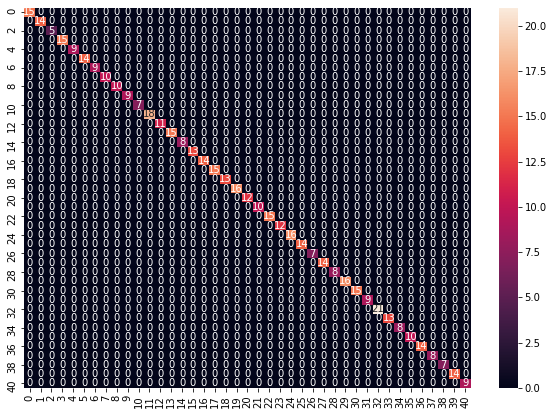

In [22]:
import seaborn as sn
df_cm = pd.DataFrame(result, range(41),range(41))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)